In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
Raw = pd.read_csv('../csv/Tabnet_Raw.csv')
Raw.replace([np.inf, -np.inf], np.nan, inplace=True)
Raw.dropna(inplace=True)
train = Raw[Raw['회계년도']<=2017]
test = Raw[Raw['회계년도']>2017]
# xgboost weight 파라미터
scale_pos_weight_ss = train['부실'].value_counts()[0] / train['부실'].value_counts()[1]

In [50]:
Y_train = pd.read_csv('../csv/Y_train.csv')
Y_test = pd.read_csv('../csv/Y_test.csv')
X_train = pd.read_csv('../csv/X_train.csv')
X_test = pd.read_csv('../csv/X_test.csv')

In [51]:
# 하이퍼파라미터 조정 전
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(max_depth=100),
        SVC(),
        RandomForestClassifier(max_depth=100),
        XGBClassifier(max_depth=100),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[], 'train_accuracy':[],'train_precision':[],'train_recall':[],'train_f1_score':[]}

    for clf in models:
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            train_results = (round(accuracy_score(y_train, train_pred), 2),
                            round(precision_score(y_train, train_pred), 2),
                            round(recall_score(y_train, train_pred), 2),
                            round(f1_score(y_train, train_pred), 2))
            test_results = (round(accuracy_score(y_test, test_pred), 2),
                            round(precision_score(y_test, test_pred), 2),
                            round(recall_score(y_test, test_pred), 2),
                            round(f1_score(y_test, test_pred), 2))
            rdict['model'].append(clf)
            rdict['train_accuracy'].append(train_results[0])
            rdict['train_precision'].append(train_results[1])
            rdict['train_recall'].append(train_results[2])
            rdict['train_f1_score'].append(train_results[3])
            rdict['accuracy'].append(test_results[0])
            rdict['precision'].append(test_results[1])
            rdict['recall'].append(test_results[2])
            rdict['f1_score'].append(test_results[3])
    
    rdf = pd.DataFrame(data=rdict)
    return rdf 

model_basic(X_train, Y_train, X_test, Y_test)

,model,accuracy,precision,recall,f1_score,train_accuracy,train_precision,train_recall,train_f1_score
0,LogisticRegression(),0.87,0.16,0.72,0.26,0.86,0.89,0.82,0.85
1,DecisionTreeClassifier(max_depth=100),0.91,0.15,0.42,0.22,1.00,1.00,1.00,1.00
2,SVC(),0.88,0.15,0.64,0.24,0.87,0.90,0.84,0.87
3,"(DecisionTreeClassifier(max_depth=100, max_fea...",0.95,0.30,0.53,0.38,1.00,1.00,1.00,1.00
4,"XGBClassifier(base_score=None, booster=None, c...",0.95,0.30,0.43,0.35,1.00,1.00,1.00,1.00
5,LGBMClassifier(),0.95,0.28,0.46,0.34,1.00,1.00,1.00,1.00


In [52]:
# 하이퍼파라미터 조정 후
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=200, class_weight='balanced'),
        DecisionTreeClassifier(criterion='gini', max_depth=30, max_features=0.1, class_weight='balanced'),
        SVC(kernel='linear', gamma='auto', C=0.1, class_weight='balanced'),
        RandomForestClassifier(n_estimators =80, criterion = 'gini', max_depth=5, max_features='sqrt', min_samples_split = 5),
        XGBClassifier(learning_rate=0.05, n_estimators=300, scale_pos_weight=scale_pos_weight_ss, min_child_weight=4, subsample=0.5, colsample_bytree=0.6, max_depth=7, gamma=1, reg_alpha=0.8, reg_lambda=0),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[], 'train_accuracy':[],'train_precision':[],'train_recall':[],'train_f1_score':[]}

    for clf in models:
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            train_results = (round(accuracy_score(y_train, train_pred), 2),
                            round(precision_score(y_train, train_pred), 2),
                            round(recall_score(y_train, train_pred), 2),
                            round(f1_score(y_train, train_pred), 2))
            test_results = (round(accuracy_score(y_test, test_pred), 2),
                            round(precision_score(y_test, test_pred), 2),
                            round(recall_score(y_test, test_pred), 2),
                            round(f1_score(y_test, test_pred), 2))
            rdict['model'].append(clf)
            rdict['train_accuracy'].append(train_results[0])
            rdict['train_precision'].append(train_results[1])
            rdict['train_recall'].append(train_results[2])
            rdict['train_f1_score'].append(train_results[3])
            rdict['accuracy'].append(test_results[0])
            rdict['precision'].append(test_results[1])
            rdict['recall'].append(test_results[2])
            rdict['f1_score'].append(test_results[3])
    
    rdf = pd.DataFrame(data=rdict)
    return rdf 

model_basic(X_train, Y_train, X_test, Y_test)

,model,accuracy,precision,recall,f1_score,train_accuracy,train_precision,train_recall,train_f1_score
0,"LogisticRegression(C=0.1, class_weight='balanc...",0.87,0.15,0.74,0.26,0.86,0.89,0.82,0.85
1,DecisionTreeClassifier(class_weight='balanced'...,0.90,0.15,0.51,0.24,1.00,1.00,1.00,1.00
2,"SVC(C=0.1, class_weight='balanced', gamma='aut...",0.87,0.16,0.72,0.26,0.86,0.89,0.82,0.85
3,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.88,0.16,0.71,0.26,0.88,0.91,0.84,0.87
4,"XGBClassifier(base_score=None, booster=None, c...",0.91,0.18,0.59,0.28,0.98,0.97,1.00,0.98
5,LGBMClassifier(),0.95,0.28,0.46,0.34,1.00,1.00,1.00,1.00


In [53]:
# stacking algorithm
# stacking 모델의 서브 알고리즘들 선언
model_LR = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=200, class_weight='balanced')
model_DT = DecisionTreeClassifier(criterion='gini', max_depth=30, max_features=0.1, class_weight='balanced')
model_SVC = SVC(kernel='linear', gamma='auto', C=0.1, class_weight='balanced')
model_RF = RandomForestClassifier(n_estimators =80, criterion = 'gini', max_depth=5, max_features='sqrt', min_samples_split = 5)
model_XGB = XGBClassifier(learning_rate=0.05, n_estimators=300, scale_pos_weight=scale_pos_weight_ss, min_child_weight=4, subsample=0.5, colsample_bytree=0.6, max_depth=7, gamma=1, reg_alpha=0.8, reg_lambda=0)



# 개별모델 내부에서 CV 적용해 Stacking하는 함수 구현(k=5)
from sklearn.model_selection import KFold

def get_stacking_datasets(model):

    # 최종 메타 모델이 사용할 학습 데이터 반환을 위해서 넘파이 배열을 0으로 만들어서 초기화
    train_fold_pred = np.zeros((X_train.shape[0], 1)) # 2차원으로
    test_pred = np.zeros((X_test.shape[0], 5)) # n_splits=5
    print(model.__class__.__name__, '모델 시작')
    
    for folder_counter, (train_idx, valid_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X_train)):
        # 개별 모델 내부에서 학습하고 1개의 fold로 예측할 데이터 셋 추출
        print(f" Fold 횟수 : {folder_counter+1}")
        X_train_ = X_train.iloc[train_idx]
        y_train_ = Y_train.iloc[train_idx]
        X_test_ = X_train.iloc[valid_idx]
        
        # 개별 모델이 학습한 후 1개의 fold데이터셋으로 예측값 반환 후 최종 메타모델이 학습할 데이터셋에 첨가
        model.fit(X_train_, y_train_)
        train_fold_pred[valid_idx, :] = model.predict(X_test_).reshape(-1,1)
        # 개별 모델이 원본 데이터셋의 검증 데이터셋을 기반으로 예측 결과값 반환 후 최종 메타모델이 검증할 데이터셋에 첨가
        test_pred[:, folder_counter] = model.predict(X_test)
    
    # 개별모델안에서 테스트 데이터셋을 기반으로 예측한 결과값들 mean취해주고 2차원으로 바꾸어주기
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean


LR_train, LR_test = get_stacking_datasets(model_LR)
DT_train, DT_test = get_stacking_datasets(model_DT)
RF_train, RF_test = get_stacking_datasets(model_RF)
SVC_train, SVC_test = get_stacking_datasets(model_SVC)

new_X_train = np.concatenate((LR_train, DT_train, RF_train, SVC_train), axis = 1)
new_X_test = np.concatenate(( LR_test, DT_test,  RF_test, SVC_test), axis = 1)

# meta learner
model_XGB.fit(new_X_train, Y_train) # 최종모델 XGB
y_test = pd.DataFrame(Y_test)
y_hat_train = pd.DataFrame(model_XGB.predict(new_X_train))
y_hat = pd.DataFrame(model_XGB.predict(new_X_test))


rdict={'model':[], "acc_train":[], "auc_train":[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}

results_train  = (round(accuracy_score(Y_train,y_hat_train),2),round(roc_auc_score(Y_train,y_hat_train),2))

results = (round(accuracy_score(Y_test,y_hat),2),
                round(precision_score(Y_test,y_hat),2),
                round(recall_score(Y_test,y_hat),2),
                round(f1_score(Y_test,y_hat),2),
                round(roc_auc_score(Y_test,y_hat),2))

rdict['model'].append("1"); 
rdict['acc_train'].append(results_train[0])
rdict['auc_train'].append(results_train[1])
rdict['acc_test'].append(results[0])
rdict['precision'].append(results[1])
rdict['recall'].append(results[2])
rdict['f1_score'].append(results[3])
rdict['AUC_test'].append(results[4])

rdf_stacking = pd.DataFrame(data=rdict)
rdf_stacking

LogisticRegression 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
DecisionTreeClassifier 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
RandomForestClassifier 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
SVC 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5


,model,acc_train,auc_train,acc_test,precision,recall,f1_score,AUC_test
0,1,0.91,0.91,0.85,0.14,0.75,0.23,0.8


In [54]:
train_save = train[['회사명', '거래소코드', '회계년도']]
test_save = test[['회사명', '거래소코드', '회계년도']]
X_train_1 = train.drop(columns=['회사명', '거래소코드', '회계년도', '부실'], axis=1)
X_test_1 = test.drop(columns=['회사명', '거래소코드', '회계년도', '부실'], axis=1)
y_train_1 = train[['부실']]
y_test_1 = test[['부실']]

In [55]:
ls = list(X_train.columns)
X_train_2 = X_train_1[ls]
y_train_2 = y_train_1.copy()

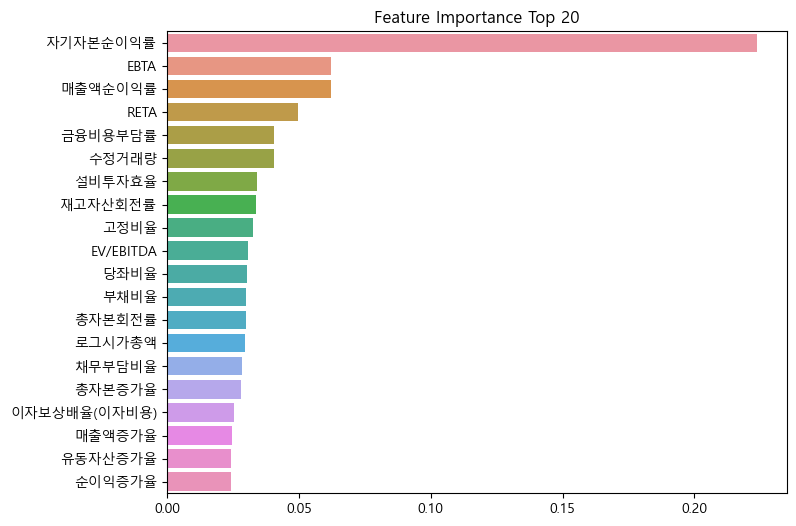

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
model = XGBClassifier(max_depth=3)
model.fit(X_train_2, y_train_2)

# 배열형태로 반환
ft_importance_values = model.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_2.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [65]:
ft_top20_df = pd.DataFrame(ft_top20).reset_index()
ft_top20_df.columns = ['features', 'importance']
feature_ls = ft_top20_df['features']

In [66]:
X_train_FI = X_train[feature_ls]
X_test_FI = X_test[feature_ls]

In [70]:
# 하이퍼파라미터 조정 후
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=200, class_weight='balanced'),
        DecisionTreeClassifier(criterion='gini', max_depth=30, max_features=0.1, class_weight='balanced'),
        SVC(kernel='linear', gamma='auto', C=0.1, class_weight='balanced'),
        RandomForestClassifier(n_estimators =80, criterion = 'gini', max_depth=5, max_features='sqrt', min_samples_split = 5),
        XGBClassifier(learning_rate=0.05, n_estimators=300, scale_pos_weight=scale_pos_weight_ss, min_child_weight=4, subsample=0.5, colsample_bytree=0.6, max_depth=7, gamma=1, reg_alpha=0.8, reg_lambda=0),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[], 'train_accuracy':[],'train_precision':[],'train_recall':[],'train_f1_score':[]}

    for clf in models:
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_train)
            test_pred = clf.predict(X_test)
            train_results = (round(accuracy_score(y_train, train_pred), 2),
                            round(precision_score(y_train, train_pred), 2),
                            round(recall_score(y_train, train_pred), 2),
                            round(f1_score(y_train, train_pred), 2))
            test_results = (round(accuracy_score(y_test, test_pred), 2),
                            round(precision_score(y_test, test_pred), 2),
                            round(recall_score(y_test, test_pred), 2),
                            round(f1_score(y_test, test_pred), 2))
            rdict['model'].append(clf)
            rdict['train_accuracy'].append(train_results[0])
            rdict['train_precision'].append(train_results[1])
            rdict['train_recall'].append(train_results[2])
            rdict['train_f1_score'].append(train_results[3])
            rdict['accuracy'].append(test_results[0])
            rdict['precision'].append(test_results[1])
            rdict['recall'].append(test_results[2])
            rdict['f1_score'].append(test_results[3])
    
    rdf = pd.DataFrame(data=rdict)
    return rdf 

model_basic(X_train_FI, Y_train, X_test_FI, Y_test)

,model,accuracy,precision,recall,f1_score,train_accuracy,train_precision,train_recall,train_f1_score
0,"LogisticRegression(C=0.1, class_weight='balanc...",0.87,0.16,0.75,0.26,0.85,0.89,0.81,0.85
1,DecisionTreeClassifier(class_weight='balanced'...,0.89,0.13,0.45,0.20,1.00,1.00,1.00,1.00
2,"SVC(C=0.1, class_weight='balanced', gamma='aut...",0.87,0.16,0.75,0.26,0.86,0.89,0.81,0.85
3,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.88,0.16,0.72,0.26,0.88,0.91,0.84,0.87
4,"XGBClassifier(base_score=None, booster=None, c...",0.90,0.19,0.67,0.30,0.98,0.96,1.00,0.98
5,LGBMClassifier(),0.95,0.28,0.51,0.37,1.00,0.99,1.00,1.00
